# 이미지 인식 - CNN

## MNIST 사례

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')/255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [4]:
# 컨볼루션 신경망 설정
# Conv2D(32 마스크의 갯수 kernel_size 마스크의 크기
#input_shape=(28,28,1) 행,열 컬러(3) 또는 흑백(1)
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3, 3), activation='elu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1000, activation='elu'),
    Dense(600, activation='elu'),    
    Dropout(0.6),
    Dense(10, activation='softmax')
])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MEDEL_DIR)

In [7]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=400, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
59600/60000 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9292
Epoch 00001: val_loss improved from inf to 0.08303, saving model to ./model/mnist-cnn-01-0.0830.hdf5
60000/60000 [==============================] - 45s 747us/sample - loss: 0.2235 - accuracy: 0.9294 - val_loss: 0.0830 - val_accuracy: 0.9726
Epoch 2/30
59600/60000 [============================>.] - ETA: 0s - loss: 0.0642 - accuracy: 0.9798
Epoch 00002: val_loss improved from 0.08303 to 0.07161, saving model to ./model/mnist-cnn-02-0.0716.hdf5
60000/60000 [==============================] - 45s 744us/sample - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.0716 - val_accuracy: 0.9763
Epoch 3/30
59600/60000 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9855
Epoch 00003: val_loss improved from 0.07161 to 0.06937, saving model to ./model/mnist-cnn-03-0.0694.hdf5
60000/60000 [==============================] - 44s 735us/sa

In [14]:
del model

In [15]:
from tensorflow.keras.models import load_model
model = load_model('model/mnist-cnn-09-0.0370.hdf5')

In [16]:
# 베스트 모델의 결과 출력 
model.evaluate(X_test, Y_test, verbose=0)[1]

0.9896

In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

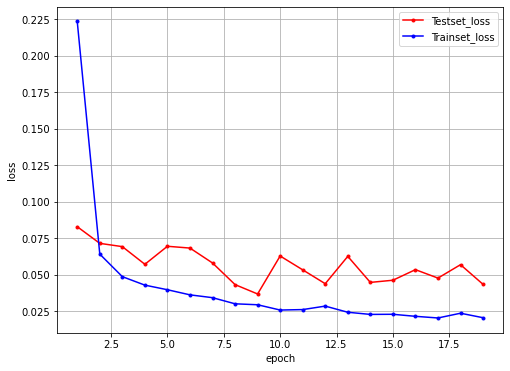

In [13]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()